0 - import libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

1 - dataset preview

1 - 1

In [83]:
df = pd.read_csv('wine.csv')

In [84]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [85]:
df.shape

(178, 14)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [87]:
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

1 - 2

In [88]:
y = df['Wine']
X = df.drop(columns=['Wine'])

In [89]:
print(y.value_counts().sort_index())

Wine
1    59
2    71
3    48
Name: count, dtype: int64


<Axes: xlabel='Wine', ylabel='count'>

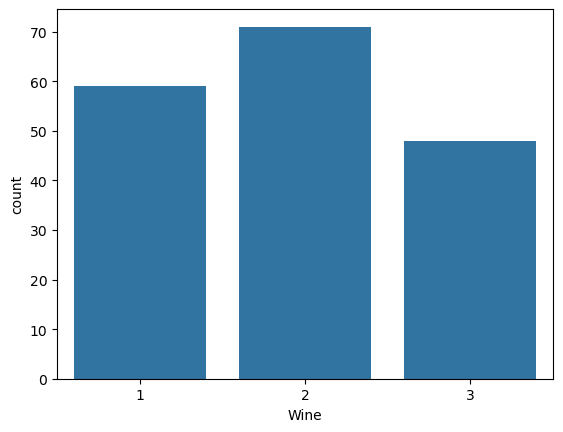

In [90]:
sns.countplot(x=df['Wine'])

1 - 3

In [91]:
df[["Alcohol", "Flavanoids", "Color.int"]].agg(['mean', 'std'])


,Alcohol,Flavanoids,Color.int
mean,13.000618,2.029270,5.058090
std,0.811827,0.998859,2.318286


<div dir="rtl">
 color.int بیشترین تغییر پذیری را دارد

1 - 4

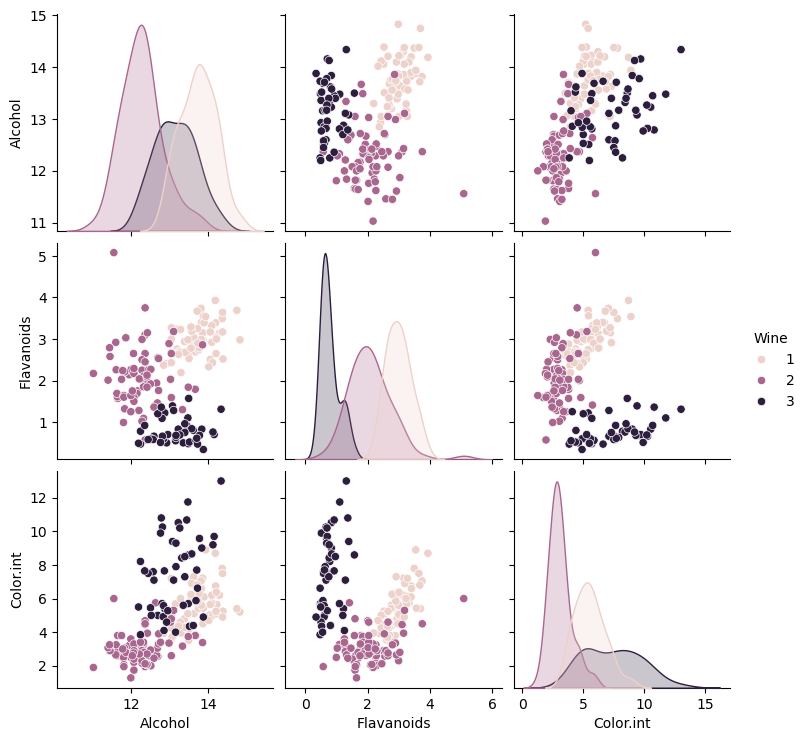

In [92]:
sns.pairplot(df, vars=["Alcohol","Flavanoids","Color.int"], hue='Wine')

2 - data splitting

2 - 1

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

<div dir="rtl">
استفاده از stratify=y باعث میشه از هر سه کلاس به یک نسبت عادلانه توی train و test داشته باشیم

In [94]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (142, 13)
y_train shape: (142,)
X_test shape: (36, 13)
y_test shape: (36,)


2 - 2

In [95]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

<div dir="rtl">
knn به فاصله ها حساس هست و استاندارد سازی باعث میشه همه ویژگی ها تاثیر برابری روی فاصله داشته باشن

2 - 3

In [96]:
knn_base = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_base.fit(X_train_s, y_train)

y_pred_base = knn_base.predict(X_test_s)

accuracy_score(y_test, y_pred_base)

0.9722222222222222

3 - pipeline and grid search

3 - 1

In [97]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

3 - 2

In [98]:
params = {
    "knn__n_neighbors": [3,5,7,9,11],
    "knn__weights": ["uniform","distance"],
    "knn__metric": ["euclidean","manhattan"]
}

In [99]:
grid = GridSearchCV(pipe, params, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [3, 5, 7, 9, 11],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

3 - 3

In [100]:
print(f'best params: {grid.best_params_}\n')
print(f'cross-validation accuracy: {grid.best_score_}')

best params: {'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}

cross-validation accuracy: 0.9862068965517242


4 - evaluation

4 - 1

In [101]:
best = grid.best_estimator_
y_pred_best = best.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Accuracy: 1.0
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



4 - 2

Text(0.5, 1.0, 'Confusion Matrix')

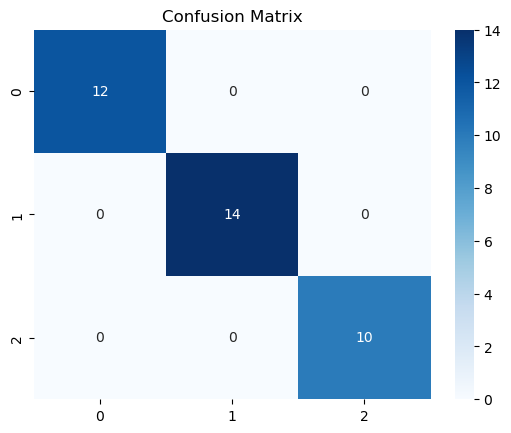

In [102]:
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")

4 - 3

<function matplotlib.pyplot.show(close=None, block=None)>

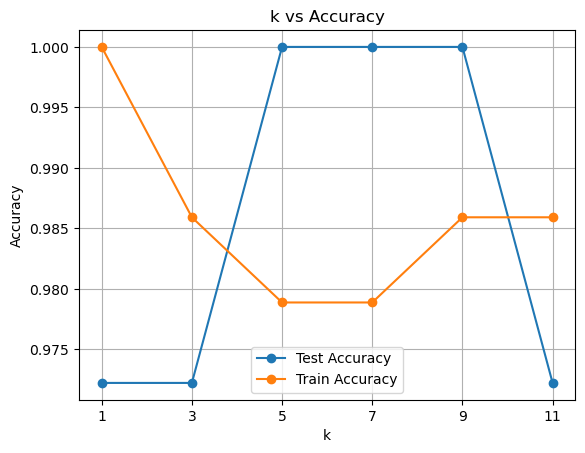

In [103]:
scores_test = []
scores_train = []

n = [1, 3, 5, 7, 9, 11]  

for k in n:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='manhattan')
    knn.fit(X_train_s, y_train)
    scores_test.append(knn.score(X_test_s, y_test))
    scores_train.append(knn.score(X_train_s, y_train))

plt.plot(n, scores_test, marker="o", label="Test Accuracy")
plt.plot(n, scores_train, marker="o", label="Train Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy")
plt.xticks(n)
plt.grid()
plt.legend()
plt.show

<div dir="rtl">


وقتی k کمه، مدل فقط به تعداد کمی از همسایه ها نگاه میکند و به نویز ها حساس میشه و باعث اورفیت شدن میشه

وقتی k زیاده، تعداد همسایه ها زیاد میشه و ویژگی ها و مرز های واقعی کلاس ها نادیده گرفته میشن و باعث آندرفیت شدن میشه

4 - 4

<div dir="rtl">

در euclidean همون فاصله خط صاف بین دو نقطه محاسبه میشه و به اختلاف ها توان میده، یعنی به اختلاف های بزرگ حساس هست اما در manhattan جمع فاصله های افقی و عمودی محاسبه میشه و به اختلاف ها توان نمیده بنابراین به اختلاف های بزرگ خیلی حساس نیست


استفاده از manhattan وقتی بهتره که داده پرت و نویز دار باشه و ابعاد یا ویژگی های داده زیاد باشه

4 - 5

In [104]:
random_samples = pd.DataFrame()

for col in X_train.columns:
    low = X_train[col].min()
    high = X_train[col].max()
    random_samples[col] = np.random.uniform(low, high, 50)

random_samples.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,11.355817,3.268882,2.133280,27.808513,119.050347,2.941234,0.775039,0.607290,1.016865,8.895515,1.434186,3.572121,967.041054
1,13.747446,5.628992,1.458098,24.973394,101.075698,2.178136,2.085432,0.586224,3.222251,6.972901,0.782793,2.588416,1262.279254
2,13.211182,3.299263,3.210697,21.386998,89.706227,2.973009,3.106442,0.138825,1.456081,11.540823,1.003800,3.439884,400.764118
3,12.886623,3.605010,3.073466,20.500286,73.562434,3.814473,2.543486,0.294742,0.845338,2.611363,0.766020,1.380173,1109.726076
4,12.913370,2.964584,1.555411,19.403881,145.078659,1.486140,0.764720,0.472041,1.638193,3.720733,1.265610,3.260823,1188.710962


In [105]:
pred = best.predict(random_samples)
pred

array([3, 3, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 2, 3, 2, 1, 1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 2, 1, 2, 1,
       3, 3, 2, 1, 1, 1])

5 - final analysis

5 - 1

<Axes: >

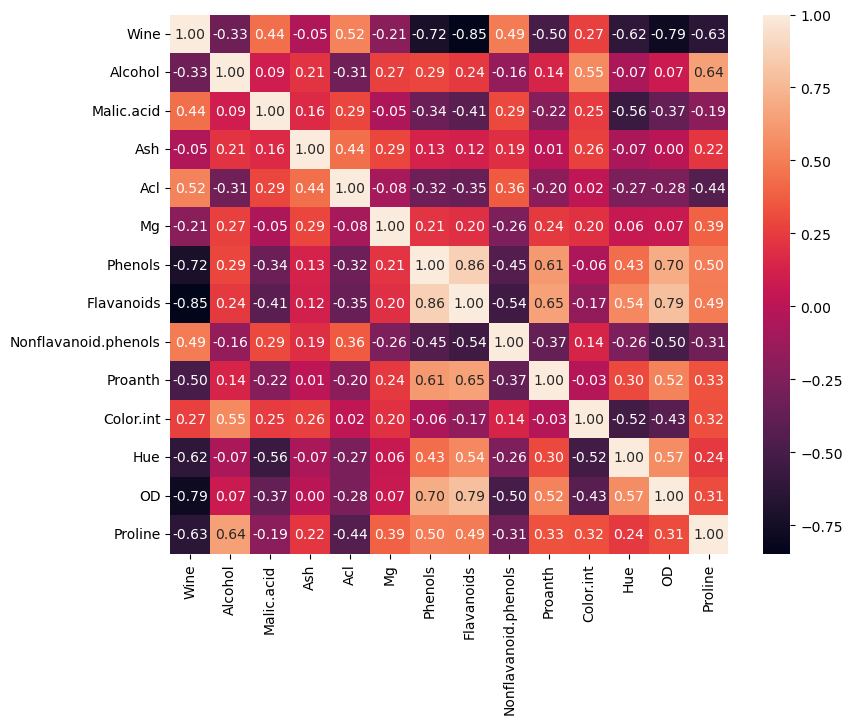

In [106]:
plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [107]:
df.corr()['Wine'].sort_values(ascending=False)

Wine                    1.000000
Acl                     0.517859
Nonflavanoid.phenols    0.489109
Malic.acid              0.437776
Color.int               0.265668
Ash                    -0.049643
Mg                     -0.209179
Alcohol                -0.328222
Proanth                -0.499130
Hue                    -0.617369
Proline                -0.633717
Phenols                -0.719163
OD                     -0.788230
Flavanoids             -0.847498
Name: Wine, dtype: float64

5 - 2

<div dir="rtl">
برای ساخت مدل سریع تر ولی با دقت مشابه میتونم فقط از ویژگی هایی استفاده کنیم که همبستگی بیشتری با target دارن و ویژگی های کم اهمیت رو حذف کنیم

5 - 3

In [108]:
log_reg = LogisticRegression()
log_reg.fit(X_train_s, y_train)

y_pred_log = log_reg.predict(X_test_s)


print('KNN:')
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print('\n')

print('Logistic Regression:')
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

KNN:
Accuracy: 1.0
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Logistic Regression:
Accuracy: 0.9722222222222222
[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



5 - 4

<div dir="rtl">
knn چون هیچ چیزی یاد نمیگیره، موقع پیش بینی باید فاصله رو با همه داده ها حساب کنه برای همین توی دیتای بزرگ خیلی کند و سنگین میشه

5 - 5

<div dir="rtl">

نقاط قوت knn:
* ساده و قابل فهم
* بدون نیاز به آموزش
* مناسب برای داده های کوچک


نقاط ضعف knn:
* کند در پیش بینی
* وابسته به مقیاس داده
* حساس به نویز


شرایطی که استفاده ازش مناسب هست:
* دیتاست کوچک
* ابعاد کم
* مرز های غیر خطی
* داده بدون نویز زیاد